In [2]:
#Preprocessing and Visualization #
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder


#Feature selection & Model selection#
from sklearn.feature_selection import SelectFromModel,RFE,SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
import lightgbm as lgb
import csv

#Metrics
from sklearn.metrics import cohen_kappa_score,f1_score,accuracy_score,confusion_matrix,recall_score,precision_score,classification_report,ConfusionMatrixDisplay

#To handle warnings
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning, module='sklearn')

In [3]:
# To load dataset from Kaggle. Click on Add Data->Search for Arrhythmia-ECG  Dataset from UCI->
#Copy the CSV file path under Input 

data = pd.read_csv("/kaggle/input/arrhythmia-ecg-dataset-from-uci/arrhythmia.csv")

# to load dataset from Google Collab
#filepath='/content/sample_data/arrhythmia.csv'
#data=pd.read_csv(filepath)



In [3]:
data.shape


(452, 280)

In [4]:
data.isna().sum().sort_values(ascending=False)

J                             376
P                              22
T                               8
QRST                            1
heartrate                       1
                             ... 
chV2_RPwave                     0
chV2_SPwave                     0
chV2_intrinsicReflecttions      0
chV2_RRwaveExists               0
class                           0
Length: 280, dtype: int64

In [4]:
##Missing Value Imputation Method 2
##KNN imputer
KNNimputer=KNNImputer(n_neighbors=5)
KNNimputeddata=KNNimputer.fit_transform(data)

KNNimputedDF=pd.DataFrame(KNNimputeddata)

# Imputation outcome
KNNimputedDF.isnull().sum().sort_values(ascending=False)

KNNimputedDF.columns=data.columns
#print(KNNimputedDF)


In [5]:
## Check that all missing values are imputed 
KNNimputedDF.isnull().sum().sort_values(ascending=False)

age                 0
chDIII_SPwaveAmp    0
chAVR_QwaveAmp      0
chAVR_JJwaveAmp     0
chDIII_QRSTA        0
                   ..
chV2_Qwave          0
chV2_Rwave          0
chV2_Swave          0
chV2_RPwave         0
class               0
Length: 280, dtype: int64

In [35]:
KNNimputedDF.describe()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.603551,0.548876,3.472862,2.002430,0.050118,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-5.600000,-4.100000,0.000000,-28.600000,0.000000,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.500000,-0.425000,6.600000,-2.100000,0.000000,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,-0.200000,0.000000,8.800000,-1.100000,0.000000,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,0.000000,11.200000,0.000000,0.000000,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,2.700000,0.000000,23.600000,0.000000,0.800000,2.400000,6.000000,88.800000,115.900000,16.000000


In [6]:
#train test split with complete featureset 
x = KNNimputedDF.drop("class", axis=1)
y = KNNimputedDF["class"]
print(y)


0       8.0
1       6.0
2      10.0
3       1.0
4       7.0
       ... 
447     1.0
448    10.0
449     2.0
450     1.0
451     1.0
Name: class, Length: 452, dtype: float64


In [7]:
# split the dataset, create 2 splits
#one with 80:20 and another one with 90:10
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#90:10 split
x_train1, x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)
print(x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape)


(361, 279) (91, 279) (361,) (91,)
(361, 279) (91, 279) (361,) (91,)


In [8]:
#normalization
scaler= StandardScaler()

scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

#normalization

scaler= StandardScaler()
x_train1=scaler.fit_transform(x_train1)
x_test1=scaler.fit_transform(x_test1)

In [9]:
#Lasso featureselection
lasso_model = Lasso(alpha=0.01,random_state=42)
lasso_model.fit(x_train, y_train)


# Extract selected features (features with non-zero coefficients)
selected_feature_indices = np.where(lasso_model.coef_ != 0)[0]
selected_features = x.columns[selected_feature_indices]
print(selected_features)


Index(['age', 'sex', 'height', 'weight', 'QRSduration', 'PRinterval',
       'Q-Tinterval', 'Tinterval', 'Pinterval', 'QRS',
       ...
       'chV5_PwaveAmp', 'chV5_QRSA', 'chV5_QRSTA', 'chV6_JJwaveAmp',
       'chV6_QwaveAmp', 'chV6_RPwaveAmp', 'chV6_PwaveAmp', 'chV6_TwaveAmp',
       'chV6_QRSA', 'chV6_QRSTA'],
      dtype='object', length=183)


In [14]:
##Hyper parameter tuning
parameters= {'alpha': np.arange(0.1,3,0.1)}    

lasso_gs = GridSearchCV(estimator=lasso_model, param_grid=parameters, cv=5,scoring='neg_mean_squared_error',verbose=3)
bestfit= lasso_gs.fit(x_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END .......................alpha=0.1;, score=-16.162 total time=   0.0s
[CV 2/5] END .......................alpha=0.1;, score=-25.810 total time=   0.0s
[CV 3/5] END .......................alpha=0.1;, score=-20.566 total time=   0.0s
[CV 4/5] END .......................alpha=0.1;, score=-21.382 total time=   0.0s
[CV 5/5] END .......................alpha=0.1;, score=-18.161 total time=   0.0s
[CV 1/5] END .......................alpha=0.2;, score=-13.571 total time=   0.0s
[CV 2/5] END .......................alpha=0.2;, score=-24.179 total time=   0.0s
[CV 3/5] END .......................alpha=0.2;, score=-16.576 total time=   0.0s
[CV 4/5] END .......................alpha=0.2;, score=-20.303 total time=   0.0s
[CV 5/5] END .......................alpha=0.2;, score=-16.765 total time=   0.0s
[CV 1/5] END .......alpha=0.30000000000000004;, score=-12.493 total time=   0.0s
[CV 2/5] END .......alpha=0.30000000000000004;,

In [8]:
lasso_model.score(x_train,y_train)


0.7105399525013754

In [10]:

x_lasso = x[selected_features]
x_train, x_test,y_train,y_test=train_test_split(x_lasso,y,test_size=0.2,random_state=2,stratify=y)
x_train1, x_test1,y_train1,y_test1=train_test_split(x_lasso,y,test_size=0.1,random_state=2,stratify=y)
print(x_lasso)


      age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  \
0    75.0  0.0   190.0    80.0         91.0       193.0        371.0   
1    56.0  1.0   165.0    64.0         81.0       174.0        401.0   
2    54.0  0.0   172.0    95.0        138.0       163.0        386.0   
3    55.0  0.0   175.0    94.0        100.0       202.0        380.0   
4    75.0  0.0   190.0    80.0         88.0       181.0        360.0   
..    ...  ...     ...     ...          ...         ...          ...   
447  53.0  1.0   160.0    70.0         80.0       199.0        382.0   
448  37.0  0.0   190.0    85.0        100.0       137.0        361.0   
449  36.0  0.0   166.0    68.0        108.0       176.0        365.0   
450  32.0  1.0   155.0    55.0         93.0       106.0        386.0   
451  78.0  1.0   160.0    70.0         79.0       127.0        364.0   

     Tinterval  Pinterval   QRS  ...  chV5_PwaveAmp  chV5_QRSA  chV5_QRSTA  \
0        174.0      121.0 -16.0  ...            0.9      

In [ ]:
rfc=RandomForestClassifier()
#parameters = {'n_estimators': [10, 20, 30, 40], 'max_features': ['sqrt', 'log2'], 'max_depth' : [6, 7, 8, 9], 'criterion' :['gini', 'entropy', 'log_loss'], 'min_samples_leaf':[1, 2, 3]} #
#parameters={'max_depth':[100, 150, 200, 250], 'n_estimators':[10, 20, 30, 40, 50], 'min_samples_leaf':[1, 2, 3, 4],'criterion' :['gini', 'entropy', 'log_loss']}
rfc_gs = GridSearchCV(estimator=rfc, param_grid=parameters, cv=10)
rfc_gs.fit(x_train, y_train)

print("best hyperparameters: ", rfc_gs.best_params_)
print("accuracy with the best parameters: ", rfc_gs.best_score_)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuacy of SVM: 67.03296703296702
Accuacy of MLP: 74.72527472527473
Accuacy of KNN: 63.73626373626373
Accuacy of RFC: 80.21978021978022
Accuacy of NB: 12.087912087912088
Accuacy of lgbm: 75.82417582417582


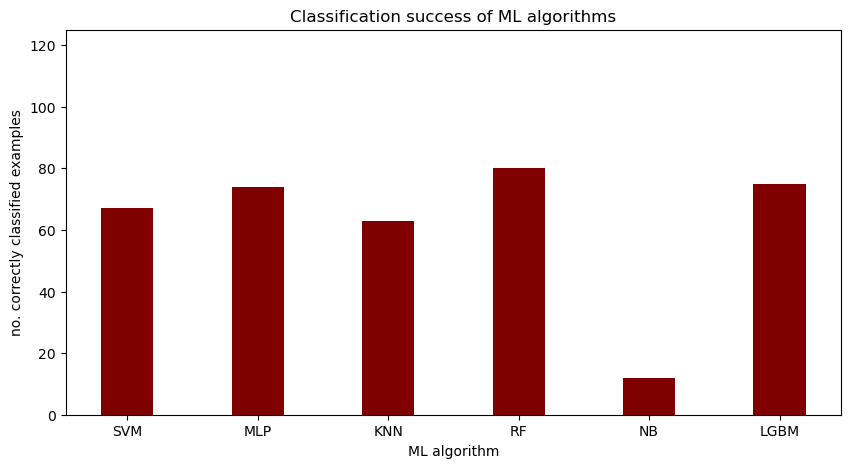

Kappa score of SVM: 0.5138888888888888
Kappa score of MLP: 0.58389662027833
Kappa score KNN: 0.31547754729883737
Kappa score RFC: 0.671677690920024
Kappa score NB: 0.05257678292555956
Kappa score lgbm: 0.5996800639872026


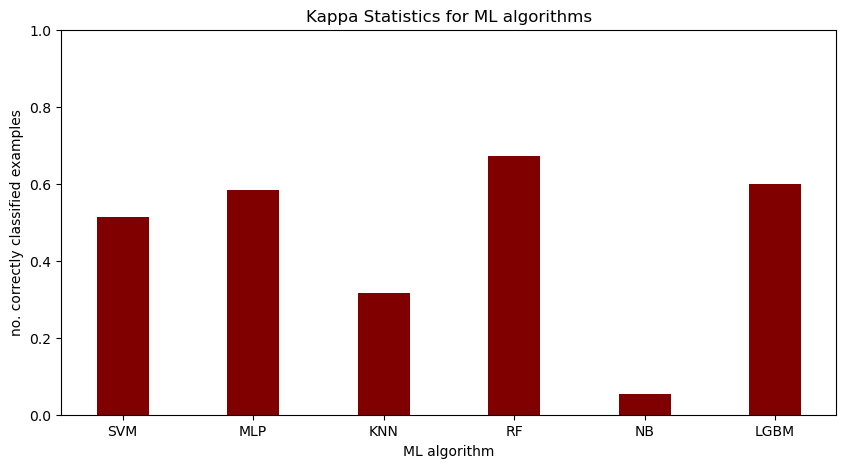

SVM_report 
               precision    recall  f1-score   support

         1.0       0.78      0.78      0.78        49
         2.0       0.50      0.56      0.53         9
         3.0       1.00      1.00      1.00         3
         4.0       1.00      0.67      0.80         3
         5.0       0.50      0.67      0.57         3
         6.0       0.20      0.20      0.20         5
         7.0       1.00      0.00      0.00         1
         8.0       0.00      1.00      0.00         0
         9.0       1.00      0.50      0.67         2
        10.0       0.73      0.80      0.76        10
        14.0       1.00      0.00      0.00         1
        15.0       0.50      1.00      0.67         1
        16.0       0.00      0.00      0.00         4

    accuracy                           0.67        91
   macro avg       0.63      0.55      0.46        91
weighted avg       0.69      0.67      0.66        91

KNN_report 
               precision    recall  f1-score   support

In [11]:
# classification models for train test split as 80:20

svm_t = SVC(C=16,kernel="linear",gamma=0.01,random_state=42,decision_function_shape='ovr').fit(x_train, y_train)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(200), activation='logistic', solver='adam', learning_rate='adaptive', max_iter=200, random_state=42)
mlp_classifier.fit(x_train, y_train)

knn_t = KNeighborsClassifier(n_neighbors=3,metric="manhattan",p=1) .fit(x_train, y_train)

rfc_t = RandomForestClassifier(criterion= 'gini', n_estimators=100, random_state=42).fit(x_train, y_train)

lgbm_classifier = lgb.LGBMClassifier(n_estimators=10, random_state=42).fit(x_train,y_train)

nb_model = GaussianNB().fit(x_train,y_train)


svm_pred = svm_t.predict(x_test)
knn_pred = knn_t.predict(x_test)
MLP_pred = mlp_classifier.predict(x_test)
rfc_pred = rfc_t.predict(x_test)
nb_pred=nb_model.predict(x_test)
lgbm_pred=lgbm_classifier.predict(x_test)

svm_acc = accuracy_score(y_test, svm_pred)*100
knn_acc = accuracy_score(y_test, knn_pred)*100
MLP_acc=accuracy_score(y_test, MLP_pred)*100
rfc_acc = accuracy_score(y_test, rfc_pred)*100
nb_acc = accuracy_score(y_test,nb_pred)*100
lgbm_acc=accuracy_score(y_test,lgbm_pred)*100

print ("Accuacy of SVM:",svm_acc)
print("Accuacy of MLP:", MLP_acc)
print ("Accuacy of KNN:", knn_acc)
print ("Accuacy of RFC:",rfc_acc)
print("Accuacy of NB:",nb_acc)
print("Accuacy of lgbm:",lgbm_acc)

bar_data = dict()
bar_data['SVM'] = int(svm_acc)
bar_data['MLP'] = int(MLP_acc)
bar_data['KNN'] = int(knn_acc)
bar_data['RF'] = int(rfc_acc)
bar_data['NB'] = int(nb_acc)
bar_data['LGBM'] = int(lgbm_acc)


algs = list(bar_data.keys())
values = list(bar_data.values())

fig = plt.figure(figsize = (10, 5))
plt.ylim(top=125)
plt.bar(algs, values, color ='maroon',
        width = 0.4)

plt.xlabel("ML algorithm")
plt.ylabel("no. correctly classified examples")
plt.title("Classification success of ML algorithms")
plt.show()


# Kappa Statistics
svm_Kappa = cohen_kappa_score(y_test, svm_pred)
knn_kappa = cohen_kappa_score(y_test, knn_pred)
MLP_kappa=cohen_kappa_score(y_test, MLP_pred)
rfc_kappa = cohen_kappa_score(y_test, rfc_pred)
nb_kappa = cohen_kappa_score(y_test,nb_pred)
lgbm_kappa=cohen_kappa_score(y_test,lgbm_pred)

print ("Kappa score of SVM:",svm_Kappa)
print("Kappa score of MLP:", MLP_kappa)
print ("Kappa score KNN:", knn_kappa)
print ("Kappa score RFC:",rfc_kappa)
print("Kappa score NB:",nb_kappa)
print("Kappa score lgbm:",lgbm_kappa)

bar_data = dict()
bar_data['SVM'] = float(svm_Kappa)
bar_data['MLP'] = float(MLP_kappa)
bar_data['KNN'] = float(knn_kappa)
bar_data['RF'] = float(rfc_kappa)
bar_data['NB'] = float(nb_kappa)
bar_data['LGBM'] = float(lgbm_kappa)


algs = list(bar_data.keys())
values = list(bar_data.values())

fig = plt.figure(figsize = (10, 5))
plt.ylim(top=1)
plt.bar(algs, values, color ='maroon',
        width = 0.4)

plt.xlabel("ML algorithm")
plt.ylabel("no. correctly classified examples")
plt.title("Kappa Statistics for ML algorithms")
plt.show()

# classification report
SVM_report= classification_report (y_test, svm_pred,zero_division=1)
knn_report = classification_report(y_test, knn_pred,zero_division=1)
MLP_report=classification_report(y_test, MLP_pred,zero_division=1)
rfc_report = classification_report(y_test, rfc_pred,zero_division=1)
nb_report= classification_report(y_test,nb_pred,zero_division=1)
lgbm_report=classification_report(y_test,lgbm_pred,zero_division=1)

print("SVM_report \n",SVM_report)

print("KNN_report \n",knn_report)

print("MLP_report \n",MLP_report)

print("RFC_report \n",rfc_report)

print("NB_report \n",nb_report)

print("lgbm_report \n",lgbm_report)




Accuacy of SVM: 69.56521739130434
Accuacy of MLP: 69.56521739130434
Accuacy of KNN: 63.04347826086957
Accuacy of RFC: 78.26086956521739
Accuacy of NB: 10.869565217391305
Accuacy of lgbm: 80.43478260869566


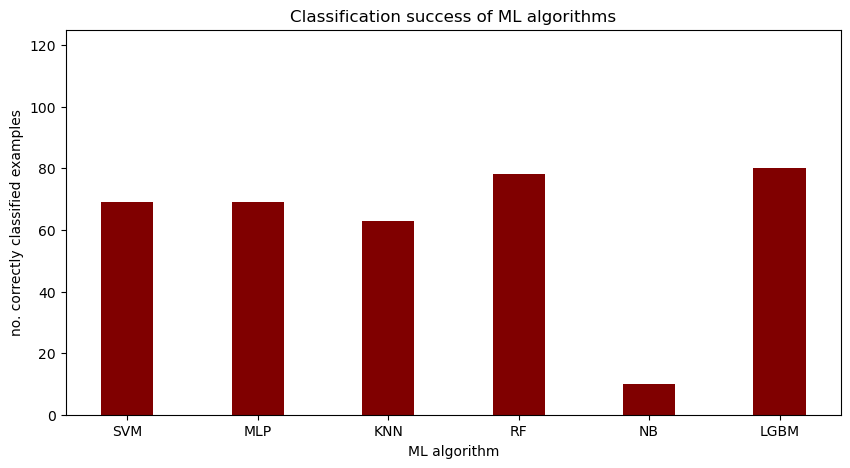

Kappa score of SVM: 0.5201192250372578
Kappa score of MLP: 0.4637801831806828
Kappa score KNN: 0.30053667262969586
Kappa score RFC: 0.6299275945293644
Kappa score NB: 0.05935162094763102
Kappa score lgbm: 0.6780715396578538


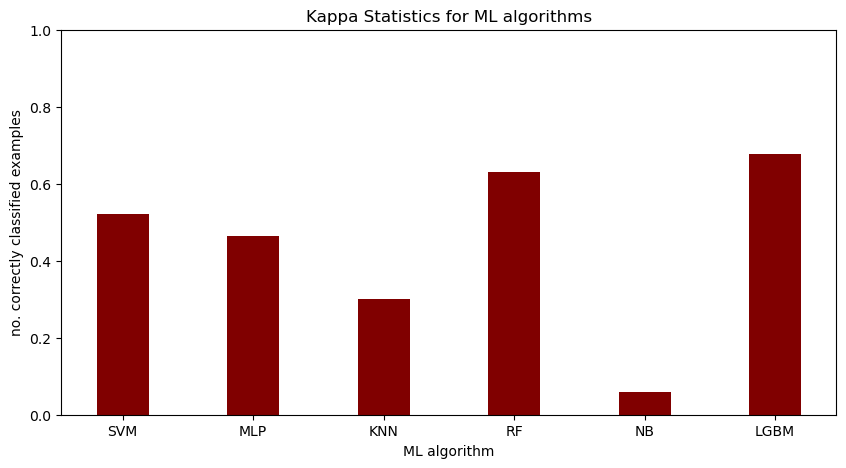

SVM_report 
               precision    recall  f1-score   support

         1.0       0.76      0.88      0.81        25
         2.0       0.50      0.50      0.50         4
         3.0       1.00      1.00      1.00         2
         4.0       1.00      0.50      0.67         2
         5.0       0.33      1.00      0.50         1
         6.0       0.00      0.00      0.00         3
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         1
        10.0       0.75      0.60      0.67         5
        15.0       1.00      1.00      1.00         1
        16.0       0.00      0.00      0.00         2

    accuracy                           0.70        46
   macro avg       0.49      0.50      0.47        46
weighted avg       0.65      0.70      0.66        46

KNN_report 
               precision    recall  f1-score   support

         1.0       0.62      0.96      0.75        25
         2.0       1.00      0.50      0.67         

In [12]:
# classification models for train test split as 90:10

svm_t = SVC(C=16,kernel="linear",gamma=0.01,random_state=42,decision_function_shape='ovr').fit(x_train1, y_train1)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(200), activation='logistic', solver='adam', learning_rate='adaptive', max_iter=200, random_state=42)
mlp_classifier.fit(x_train1, y_train1)

knn_t = KNeighborsClassifier(n_neighbors=3,metric="manhattan",p=1) .fit(x_train1, y_train1)

rfc_t = RandomForestClassifier(criterion= 'gini', n_estimators=100, random_state=42).fit(x_train1, y_train1)

lgbm_classifier = lgb.LGBMClassifier(n_estimators=10, random_state=42).fit(x_train1,y_train1)

nb_model = GaussianNB().fit(x_train1,y_train1)


svm_pred = svm_t.predict(x_test1)
knn_pred = knn_t.predict(x_test1)
MLP_pred = mlp_classifier.predict(x_test1)
rfc_pred = rfc_t.predict(x_test1)
nb_pred=nb_model.predict(x_test1)
lgbm_pred=lgbm_classifier.predict(x_test1)

svm_acc = accuracy_score(y_test1, svm_pred)*100
knn_acc = accuracy_score(y_test1, knn_pred)*100
MLP_acc=accuracy_score(y_test1, MLP_pred)*100
rfc_acc = accuracy_score(y_test1, rfc_pred)*100
nb_acc = accuracy_score(y_test1,nb_pred)*100
lgbm_acc=accuracy_score(y_test1,lgbm_pred)*100

print ("Accuacy of SVM:",svm_acc)
print("Accuacy of MLP:", MLP_acc)
print ("Accuacy of KNN:", knn_acc)
print ("Accuacy of RFC:",rfc_acc)
print("Accuacy of NB:",nb_acc)
print("Accuacy of lgbm:",lgbm_acc)

bar_data = dict()
bar_data['SVM'] = int(svm_acc)
bar_data['MLP'] = int(MLP_acc)
bar_data['KNN'] = int(knn_acc)
bar_data['RF'] = int(rfc_acc)
bar_data['NB'] = int(nb_acc)
bar_data['LGBM'] = int(lgbm_acc)


algs = list(bar_data.keys())
values = list(bar_data.values())

fig = plt.figure(figsize = (10, 5))
plt.ylim(top=125)
plt.bar(algs, values, color ='maroon',
        width = 0.4)

plt.xlabel("ML algorithm")
plt.ylabel("no. correctly classified examples")
plt.title("Classification success of ML algorithms")
plt.show()


# Kappa Statistics
svm_Kappa = cohen_kappa_score(y_test1, svm_pred)
knn_kappa = cohen_kappa_score(y_test1, knn_pred)
MLP_kappa=cohen_kappa_score(y_test1, MLP_pred)
rfc_kappa = cohen_kappa_score(y_test1, rfc_pred)
nb_kappa = cohen_kappa_score(y_test1,nb_pred)
lgbm_kappa=cohen_kappa_score(y_test1,lgbm_pred)

print ("Kappa score of SVM:",svm_Kappa)
print("Kappa score of MLP:", MLP_kappa)
print ("Kappa score KNN:", knn_kappa)
print ("Kappa score RFC:",rfc_kappa)
print("Kappa score NB:",nb_kappa)
print("Kappa score lgbm:",lgbm_kappa)

bar_data = dict()
bar_data['SVM'] = float(svm_Kappa)
bar_data['MLP'] = float(MLP_kappa)
bar_data['KNN'] = float(knn_kappa)
bar_data['RF'] = float(rfc_kappa)
bar_data['NB'] = float(nb_kappa)
bar_data['LGBM'] = float(lgbm_kappa)


algs = list(bar_data.keys())
values = list(bar_data.values())

fig = plt.figure(figsize = (10, 5))
plt.ylim(top=1)
plt.bar(algs, values, color ='maroon',
        width = 0.4)

plt.xlabel("ML algorithm")
plt.ylabel("no. correctly classified examples")
plt.title("Kappa Statistics for ML algorithms")
plt.show()

# classification report
SVM_report= classification_report (y_test1, svm_pred)
knn_report = classification_report(y_test1, knn_pred,zero_division=1)
MLP_report=classification_report(y_test1, MLP_pred,zero_division=1)
rfc_report = classification_report(y_test1, rfc_pred,zero_division=1)
nb_report= classification_report(y_test1,nb_pred,zero_division=1)
lgbm_report=classification_report(y_test1,lgbm_pred,zero_division=1)

print("SVM_report \n",SVM_report)

print("KNN_report \n",knn_report)

print("MLP_report \n",MLP_report)

print("RFC_report \n",rfc_report)

print("NB_report \n",nb_report)

print("lgbm_report \n",lgbm_report)




In [ ]:
#RandomizedSearchCV hyperparameter turning for MLP#
model=MLPClassifier()
parameters = {
    
'activation':['identity', 'logistic', 'tanh', 'relu'],
'solver':['lbfgs', 'sgd', 'adam'],
'learning_rate':['constant', 'invscaling', 'adaptive'],
'max_iter':[100,200]
       
    }

classifier=RandomizedSearchCV(model,parameters,cv=5)
classifier.fit(x_train,y_train)
classifier.cv_results_
results2=pd.DataFrame(classifier.cv_results_)
#print(results2)
best_param2 = classifier.best_params_
print(best_param2)
high_accuracy2=classifier.best_score_
print(high_accuracy2)

In [ ]:
#SVM hyper parameter tuning

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'gamma': [0.1, 0.01, 0.001, 0.0009, 0.0005, 0.0001]}
svm = SVC()

svm_gs = GridSearchCV(svm, parameters)
svm_gs.fit(x_train, y_train)
GridSearchCV(estimator=SVC(), param_grid=parameters, scoring='accuracy', cv=10)

print("best hyperparameters: ", svm_gs.best_params_)
print("accuracy with the best parameters: ", svm_gs.best_score_)

In [38]:
#KNN hyper parameter tuning
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
#parameters = dict(n_neighbors=k_range)
parameters={'metric':('manhattan','euclidean','chebyshev','minkowski'),
            'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],'weights':('uniform','Distance'),
           'algorithm':('auto','ball_tree','kd_tree','brute'), 'p':[1,2]}

knn_gs = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')

knn_gs.fit(x_train, y_train)

print("best hyperparameters: ", knn_gs.best_params_)
print("accuracy with the best parameters: ", knn_gs.best_score_)

best hyperparameters:  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}
accuracy with the best parameters:  0.6123123123123124


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=30.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=30.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=30.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

Cross validation score of SVM: 0.6440277777777779
Cross validation score of MLP: 0.7170833333333335
Cross validation score of KNN: 0.6262500000000002
Cross validation score of RFC: 0.723888888888889
Cross validation score of NB: 0.1413888888888889
Cross validation score of lgbm: 0.7129166666666669


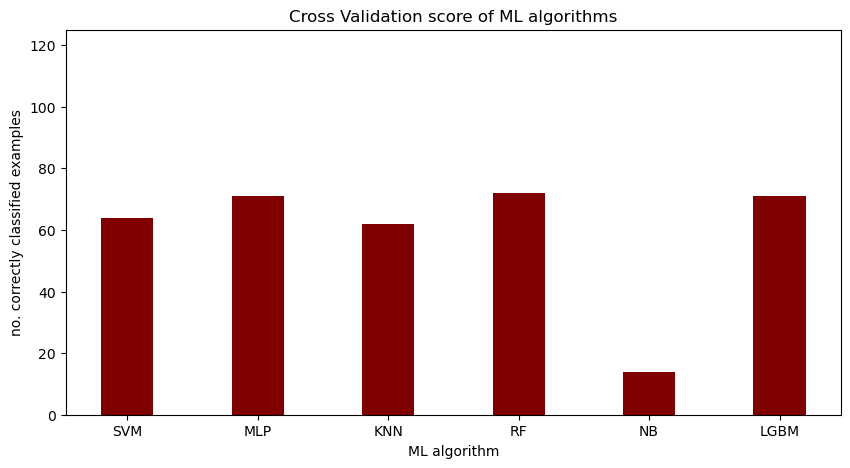

In [34]:
# cross val score of classification models

lgbm_score=cross_val_score(lgbm_classifier,x_lasso,y,cv=30,scoring='accuracy').mean()
svm_score=cross_val_score(svm_t,x_lasso,y,cv=30,scoring='accuracy').mean()
mlp_score=cross_val_score(mlp_classifier,x_lasso,y,cv=30,scoring='accuracy').mean()
knn_score=cross_val_score(knn_t,x_lasso,y,cv=30,scoring='accuracy').mean()
rfc_score=cross_val_score(rfc_t,x_lasso,y,cv=30,scoring='accuracy').mean()
nb_score=cross_val_score(nb_model,x_lasso,y,cv=30,scoring='accuracy').mean()

print ("Cross validation score of SVM:",svm_score)
print("Cross validation score of MLP:", mlp_score)
print ("Cross validation score of KNN:", knn_score)
print ("Cross validation score of RFC:",rfc_score)
print("Cross validation score of NB:",nb_score)
print("Cross validation score of lgbm:",lgbm_score)

bar_data = dict()
bar_data['SVM'] = int(svm_score * 100)
bar_data['MLP'] = int(mlp_score *100)
bar_data['KNN'] = int(knn_score * 100)
bar_data['RF'] = int(rfc_score * 100)
bar_data['NB'] = int(nb_score *100)
bar_data['LGBM'] = int(lgbm_score *100)


algs = list(bar_data.keys())
values = list(bar_data.values())

fig = plt.figure(figsize = (10, 5))
plt.ylim(top=125)
plt.bar(algs, values, color ='maroon',
        width = 0.4)

plt.xlabel("ML algorithm")
plt.ylabel("no. correctly classified examples")
plt.title("Cross Validation score of ML algorithms")
plt.show()

In [15]:
#Stratified k-fold#
#Normalize the features selected from Original Dataset#
scaler= StandardScaler()
x_lasso=scaler.fit_transform(x_lasso)

# Labelling#
X = x_lasso  # Features
y = y    # Target labels

# Number of desired folds (k)
n_splits = 30

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterate through the splits
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Replace the following with your model training and evaluation code
    # For example, you can train your model on X_train and y_train and evaluate it on X_test and y_test
    model= lgbm_classifier.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    
    # Print or store the evaluation results
    print("Model Score",accuracy.mean())

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=30.
  warnings.warn(


Model Score 0.5
Model Score 0.5
Model Score 0.7333333333333333
Model Score 0.7333333333333333
Model Score 0.7333333333333333
Model Score 0.8
Model Score 0.8666666666666667
Model Score 0.7333333333333333
Model Score 0.6666666666666666
Model Score 0.8666666666666667
Model Score 0.8
Model Score 0.7333333333333333
Model Score 0.8
Model Score 0.6666666666666666
Model Score 0.6666666666666666
Model Score 0.8
Model Score 0.6666666666666666
Model Score 0.7333333333333333
Model Score 0.8
Model Score 0.8
Model Score 0.6
Model Score 0.8
Model Score 0.6666666666666666
Model Score 0.7333333333333333
Model Score 0.7333333333333333
Model Score 0.6666666666666666
Model Score 0.6666666666666666
Model Score 0.6
Model Score 0.6666666666666666
Model Score 0.8666666666666667


In [17]:
print('Model Score for LightGBM',accuracy.mean())

Model Score for LightGBM 0.8666666666666667
